In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from collections import Counter

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
#loading the given dataset...

df = pd.read_csv('/Users/livdea/DSML Project/spatiotemporal_trn_data.csv')
chip = pd.read_csv('/Users/livdea/DSML Project/spatiotemporal_trn_targets.csv', names=['VISIBILITY'])

df

/Users/livdea/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,11,13,18,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,42369099999,2013-05-05T11:30:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-12,4,NaN,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42369099999,2019-01-23T22:00:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-15,4,30.06,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42452099999,2005-02-17T08:30:00,25.160219,75.845631,273.10,"KOTA, IN",FM-12,4,NaN,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42369099999,1984-05-20T08:30:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-12,4,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42503099999,2016-11-16T11:30:00,25.033333,88.133333,31.00,"MALDA, IN",FM-12,4,NaN,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,42452099999,2002-10-27T23:30:00,25.160219,75.845631,273.10,"KOTA, IN",FM-12,4,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934803,42260099999,1987-05-23T08:30:00,27.155831,77.960892,167.94,"AGRA, IN",FM-12,4,NaN,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934804,42634099999,2011-11-01T05:30:00,23.287828,69.670147,81.68,"BHUJ, IN",FM-12,4,NaN,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934805,42369099999,2018-08-22T19:00:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-15,4,29.47,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()                     #preliminary overview of the dataset...

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureTendency,HourlyRelativeHumidity,HourlyWetBulbTemperature,Sunrise,Sunset,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
count,9.348070e+05,934807.000000,934807.000000,934807.000000,934807.0,586427.000000,916208.000000,24222.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.238809e+10,26.291632,78.856385,202.016849,4.0,8.961412,62.890431,60.814425,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.313338e+08,1.620532,5.079950,325.431435,0.0,0.479920,24.139249,10.878555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.203010e+10,23.287828,69.670147,31.000000,4.0,0.000000,1.000000,28.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.236910e+10,25.160219,75.845631,81.680000,4.0,9.000000,44.000000,52.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.236910e+10,26.760594,80.889339,124.960000,4.0,9.000000,66.000000,61.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.245210e+10,26.760594,80.889339,167.940000,4.0,9.000000,84.000000,68.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.267210e+10,34.433333,93.983333,3066.000000,4.0,9.000000,100.000000,91.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1 = df.isna().sum(axis = 0)     #total number of NaN values...
df1

STATION                         0
DATE                            0
LATITUDE                        0
LONGITUDE                       0
ELEVATION                       0
                            ...  
BackupEquipment            934807
BackupLatitude             934807
BackupLongitude            934807
BackupName                 934807
WindEquipmentChangeDate    934807
Length: 122, dtype: int64

In [6]:
#gives the number of attributes having really high number of missing values...

count = 0
for i in range(122):
    if df1[i] > 930000:
        count += 1
print(count)

100


In [7]:
#droping colums based of high frequency of missing values...

count = 0
for col in df.columns:
    if df1[col] > 900000:
        count += 1
        del df[col]
        
for col in df.columns:
    if col == 'REM' or col == 'SOURCE' or col == 'ShortDurationPrecipitationValue150' or col == 'REPORT_TYPE':
        del df[col]

In [8]:
#When the target was taken into picture, it was found that even the targets were not clean.
#The following tells us about the noise in the targets.


df_labels = pd.read_csv('/Users/livdea/DSML Project/spatiotemporal_trn_targets.csv', names = ['Visibility'])
df_labels = df_labels.set_index(df.index)

noise = []

for i in df_labels['Visibility']:
    try:
        float(i)
    except ValueError:
        noise.append(i)
print(noise)

['0.14V', '0.06V', '0.14V', '0.16V', '0.00V', '0.17V', '0.06V', '0.14V', '0.14V', '0.00V', '0.00V', '0.16V', '0.17V', '0.00V']


In [9]:
#Cleaning the target:

for i in range(0,934807):
    try:
        float(df_labels['Visibility'][i])
    except ValueError:
        df_labels['Visibility'][i] = df_labels['Visibility'][i][:-1]
        

noise = []
for i in df_labels['Visibility']:
    try:
        float(i)
    except ValueError:
        noise.append(i)
print(noise)

[]


In [10]:
df['Visibility'] = df_labels

In [11]:
df = df.sort_values(by='DATE')           #sorting chronologically...
df = df.reset_index(drop = True)         #resetting the indexing order...
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility
0,42260099999,1942-08-24T07:30:00,27.155831,77.960892,167.94,"AGRA, IN",NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,NaN,113,3,99.42
1,42260099999,1942-08-24T08:30:00,27.155831,77.960892,167.94,"AGRA, IN",NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,NaN,113,8,99.42
2,42260099999,1942-08-24T09:30:00,27.155831,77.960892,167.94,"AGRA, IN",NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,NaN,135,8,99.42
3,42260099999,1942-08-24T10:30:00,27.155831,77.960892,167.94,"AGRA, IN",NaN,NaN,NaN,NaN,NaN,NaN,SCT:04 15,NaN,135,9,99.42
4,42260099999,1942-08-24T11:30:00,27.155831,77.960892,167.94,"AGRA, IN",NaN,NaN,NaN,NaN,NaN,NaN,BKN:06 FEW:01,NaN,135,8,99.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,42379099999,2021-01-21T02:30:00,26.739708,83.449708,78.94,"GORAKHPUR, IN",NaN,48,52,||FG,9.0,88.0,VV:09,29.86,0,0,0.03
934803,42369099999,2021-01-21T02:30:00,26.760594,80.889339,124.96,"LUCKNOW, IN",NaN,51,54,NaN,9.0,88.0,NaN,29.91,250,3,0.62
934804,42634099999,2021-01-21T02:30:00,23.287828,69.670147,81.68,"BHUJ, IN",NaN,44,60,NaN,9.0,55.0,NaN,29.97,0,0,2.49
934805,42170099999,2021-01-21T02:30:00,28.250000,74.916667,291.00,"CHURU, IN",NaN,41,45,NaN,9.0,85.0,NaN,29.99,0,0,2.49


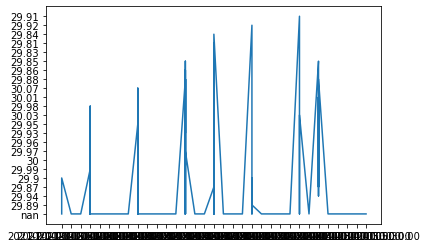

<Figure size 1008x792 with 0 Axes>

['88s', '71s', '32s', '54s', '40s', '66s', '54s', '62s', '55s', '37s', '55s', '54s', '-45s', '69s', '50s', '71s', '48s', '48s', '42s', '47s', '36s', '33s', '35s', '53s', '27s', '39s', '7s', '34s', '73s', '60s', '-30s', '-36s', '11s', '73s', '54s', '54s', '54s', '57s', '34s', '28s', '30s', '36s', '61s', '21s', '28s', '43s', '43s', '63s', '37s', '68s', '46s', '48s', '75s', '41s', '36s', '39s', '27s', '52s', '36s', '82s', '28s', '34s', '41s', '30s', '32s', '34s', '34s', '54s', '63s', '59s', '63s', '52s', '57s', '54s', '72s', '64s', '46s', '75s', '54s', '66s', '50s', '43s', '34s', '54s', '39s', '77s', '75s', '55s', '54s', '-9s', '55s', '41s', '72s', '70s', '36s', '59s', '79s', '54s', '54s', '66s', '37s', '66s', '48s', '88s', '39s', '81s', '79s', '82s', '66s', '77s', '70s', '75s', '45s', '54s', '75s', '64s', '37s', '55s', '61s', '25s', '57s', '50s', '59s', '52s', '54s', '52s', '54s', '50s', '54s', '36s', '43s', '48s', '52s', '16s', '55s', '68s', '79s', '36s', '75s', '41s', '75s', '79s', '59

In [12]:
#the following code in the cell were manipulatively executed 
#in order to understand the noise levels and patterns in the dataset given 


#df.HourlyPressureTendency.fillna(0, inplace=True)
#df.describe()

X = df.iloc[-200:-100, 1].to_list()
Y = df.iloc[-200:-100, 13].to_list()

plt.plot(X, Y)
#df.plot(kind='line', x='DATE', y='HourlyRelativeHumidity')
plt.figure(figsize=(14,11)) 
plt.show()


noise = []
for i in df.HourlyDewPointTemperature:
    try:
        float(i)
    except ValueError:
        noise.append(i)
print(noise)

In [13]:
#noise removal experiment on a certain attribute
#part of data cleaning

for i in range(0,934807):
    try:
        float(df.HourlyDewPointTemperature[i])
    except ValueError:
        df.HourlyDewPointTemperature[i] = df.HourlyDewPointTemperature[i][:-1]
        float(df.HourlyDewPointTemperature[i])

df.HourlyDewPointTemperature

<ipython-input-13-4f08b712040b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HourlyDewPointTemperature[i] = df.HourlyDewPointTemperature[i][:-1]


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
934802     48
934803     51
934804     44
934805     41
934806     49
Name: HourlyDewPointTemperature, Length: 934807, dtype: object

In [14]:
#a check point to verify if the data cleaning 
#experiment was succeful or not...it seems it was!

clan = []
for i in df.HourlyDewPointTemperature:
    try:
        float(i)
    except ValueError:
        clan.append(i)
print(clan)

[]


In [15]:
#another attribute under the radar of data cleaning...

for i in range(0,934807):
    if df['HourlyWindDirection'][i] != 'VRB':
        try:
            float(df['HourlyWindDirection'][i])
        except ValueError:
            df['HourlyWindDirection'][i] = df['HourlyWindDirection'][i][:-1]

<ipython-input-15-afa81229b3a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HourlyWindDirection'][i] = df['HourlyWindDirection'][i][:-1]


In [16]:
#repeating the data cleaning experimental setup on further attributes
#for the purpose of noise reduction

for j in ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureTendency', 
          'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyWindSpeed']:
    for i in range(0,934807):
        try:
            float(df[j][i])
        except ValueError:
            df[j][i] = df[j][i][:-1]
            float(df[j][i])

<ipython-input-16-b13175bb57a0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j][i][:-1]


In [18]:
#ENCODING PART 1:

#after several amount of literature survey, the following two methods 
#were taken under primary consideration for encoding categorical data:

#1. Base N encoding: if base is 2 then its basically Binary Encoding!
#2. Target encoding: Bayesian Encoders are used!


#Target Encoding:

#encoder = ce.TargetEncoder(cols=calzone, handle_missing='return_nan')
#encoded_data = encoder.fit_transform(df['HourlyPresentWeatherType'],df['Visibility'])
#encoded_data


#Base N encoding:

calzone = ['HourlyPresentWeatherType']

encoder= ce.BaseNEncoder(cols=calzone,return_df=True,base=6)
data_encoded=encoder.fit_transform(df['HourlyPresentWeatherType'])
data_encoded

,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
934802,0,1,0
934803,0,0,1
934804,0,0,1
934805,0,0,1


In [19]:
#ENCODING PART 2:

#encoding the second attribute containing categorical data
#manual encoding has been done and a lot of literature survey was required to arrive at 
#optimum conclusions

maximus = []
glad = []
for i in df['HourlySkyConditions']:
    if (':' in str(i)):
        count = Counter(i)
        maximus.append(count[':'])
        sword = [j for j, ltr in enumerate(i) if ltr == ':']
        cus = 0
        for k in sword:
            cul = int(i[k+1:k+3])
            cus = cus + cul
        glad.append(cus)
        
win = int(max(maximus))
final = [item/(win*8) for item in glad]

cup = []
flag = 0
for x in df['HourlySkyConditions']:
    if pd.isna(x):
        cup.append(float(x))
    else:
        cup.append(final[flag])
        flag += flag
        
HourlySkyConditions_01 = pd.DataFrame(cup)
HourlySkyConditions_01

,0
0,0.125
1,0.125
2,0.125
3,0.125
4,0.125
...,...
934802,0.125
934803,NaN
934804,NaN
934805,NaN


In [20]:
#after processing a considerable amount of domain knowledge...many attributes were found to be
#of very less value in terms of relevance.

#Thus, they were simply dropped


df_copy = df.copy()                         #now onwards...we will work on a local copy of the dataset

for col in df_copy.columns:
    if col == 'NAME' or col == 'SOURCE' or col == 'HourlyPresentWeatherType' or col == 'HourlySkyConditions':
        del df_copy[col]
        
df_copy

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility
0,42260099999,1942-08-24T07:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,3,99.42
1,42260099999,1942-08-24T08:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,8,99.42
2,42260099999,1942-08-24T09:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42
3,42260099999,1942-08-24T10:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,9,99.42
4,42260099999,1942-08-24T11:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,42379099999,2021-01-21T02:30:00,26.739708,83.449708,78.94,NaN,48,52,9.0,88.0,29.86,0,0,0.03
934803,42369099999,2021-01-21T02:30:00,26.760594,80.889339,124.96,NaN,51,54,9.0,88.0,29.91,250,3,0.62
934804,42634099999,2021-01-21T02:30:00,23.287828,69.670147,81.68,NaN,44,60,9.0,55.0,29.97,0,0,2.49
934805,42170099999,2021-01-21T02:30:00,28.250000,74.916667,291.00,NaN,41,45,9.0,85.0,29.99,0,0,2.49


In [21]:
#preparing the dataset after encoding the categorical data

df_copy['HourlyPresentWeatherType_0'] = data_encoded['HourlyPresentWeatherType_0']
df_copy['HourlyPresentWeatherType_1'] = data_encoded['HourlyPresentWeatherType_1']
df_copy['HourlyPresentWeatherType_2'] = data_encoded['HourlyPresentWeatherType_2']
df_copy['HourlySkyConditions_01'] = HourlySkyConditions_01[0]
df_copy

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01
0,42260099999,1942-08-24T07:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,3,99.42,0,0,1,0.125
1,42260099999,1942-08-24T08:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,8,99.42,0,0,1,0.125
2,42260099999,1942-08-24T09:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42,0,0,1,0.125
3,42260099999,1942-08-24T10:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,9,99.42,0,0,1,0.125
4,42260099999,1942-08-24T11:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42,0,0,1,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,42379099999,2021-01-21T02:30:00,26.739708,83.449708,78.94,NaN,48,52,9.0,88.0,29.86,0,0,0.03,0,1,0,0.125
934803,42369099999,2021-01-21T02:30:00,26.760594,80.889339,124.96,NaN,51,54,9.0,88.0,29.91,250,3,0.62,0,0,1,NaN
934804,42634099999,2021-01-21T02:30:00,23.287828,69.670147,81.68,NaN,44,60,9.0,55.0,29.97,0,0,2.49,0,0,1,NaN
934805,42170099999,2021-01-21T02:30:00,28.250000,74.916667,291.00,NaN,41,45,9.0,85.0,29.99,0,0,2.49,0,0,1,NaN


In [22]:
#for the attribute 'HourlyWindDirection', some serious data encoding for data points like 'VRB' 
#are on progress and for the time being the usage of this attribute is on hold.

#after this we will be directly entering the 'NAN-VALUE IMPUTATION STAGE'.

In [23]:
#Fixing 'VRB's in the attribute 'HourlyWindDirection':

megazord = []
for i in df_copy.HourlyWindDirection:
    if (pd.isna(i))==False and i not in 'VRB':
        megazord.append(float(i))
superzord = pd.DataFrame(megazord)
red = superzord.mean()
blue = superzord.std()


for i in range(len(df_copy.HourlyWindDirection)):
    if df_copy.HourlyWindDirection[i] == 'VRB':
        df_copy.HourlyWindDirection[i] = np.random.normal(loc=red, scale=blue, size=None)
        
df_copy

<ipython-input-23-91da83796524>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.HourlyWindDirection[i] = np.random.normal(loc=red, scale=blue, size=None)


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01
0,42260099999,1942-08-24T07:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,3,99.42,0,0,1,0.125
1,42260099999,1942-08-24T08:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,113,8,99.42,0,0,1,0.125
2,42260099999,1942-08-24T09:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42,0,0,1,0.125
3,42260099999,1942-08-24T10:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,9,99.42,0,0,1,0.125
4,42260099999,1942-08-24T11:30:00,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,135,8,99.42,0,0,1,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,42379099999,2021-01-21T02:30:00,26.739708,83.449708,78.94,NaN,48,52,9.0,88.0,29.86,0,0,0.03,0,1,0,0.125
934803,42369099999,2021-01-21T02:30:00,26.760594,80.889339,124.96,NaN,51,54,9.0,88.0,29.91,250,3,0.62,0,0,1,NaN
934804,42634099999,2021-01-21T02:30:00,23.287828,69.670147,81.68,NaN,44,60,9.0,55.0,29.97,0,0,2.49,0,0,1,NaN
934805,42170099999,2021-01-21T02:30:00,28.250000,74.916667,291.00,NaN,41,45,9.0,85.0,29.99,0,0,2.49,0,0,1,NaN


In [24]:
#checking for noise in the 'HourlyWindDirection' attribute:

noise = []
for i in df_copy.HourlyWindDirection:
    try:
        float(i)
    except ValueError:
        noise.append(i)
print(noise)

[]


In [25]:
#Fixing 'Date' attribute:

date = df_copy['DATE']
del df_copy['DATE']

In [26]:
#IMPUTATION OF MISSING VALUES:


impute_it = IterativeImputer()
X_impute = impute_it.fit_transform(df_copy)

cls = list(df_copy.columns)
df_enc = pd.DataFrame(X_impute, columns = cls)
df_enc

,STATION,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01
0,4.226010e+10,27.155831,77.960892,167.94,29.578492,61.086459,77.394935,5.224485,61.628951,29.770863,113.0,3.0,99.42,0.0,0.0,1.0,0.125
1,4.226010e+10,27.155831,77.960892,167.94,29.578411,61.098600,77.410243,5.182860,61.619515,29.754247,113.0,8.0,99.42,0.0,0.0,1.0,0.125
2,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125
3,4.226010e+10,27.155831,77.960892,167.94,29.578365,61.111175,77.441955,5.176209,61.533592,29.750294,135.0,9.0,99.42,0.0,0.0,1.0,0.125
4,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,4.237910e+10,26.739708,83.449708,78.94,29.404457,48.000000,52.000000,9.000000,88.000000,29.860000,0.0,0.0,0.03,0.0,1.0,0.0,0.125
934803,4.236910e+10,26.760594,80.889339,124.96,29.644422,51.000000,54.000000,9.000000,88.000000,29.910000,250.0,3.0,0.62,0.0,0.0,1.0,0.125
934804,4.263410e+10,23.287828,69.670147,81.68,29.438006,44.000000,60.000000,9.000000,55.000000,29.970000,0.0,0.0,2.49,0.0,0.0,1.0,0.125
934805,4.217010e+10,28.250000,74.916667,291.00,29.632987,41.000000,45.000000,9.000000,85.000000,29.990000,0.0,0.0,2.49,0.0,0.0,1.0,0.125


In [27]:
#adding the date attribute in date-time format

df_enc['DATE'] = pd.to_datetime(date,format='%Y-%m-%dT%H:%M:%S')

In [28]:
#Cleaning the target:

for i in range(0,934807):
    try:
        float(df_labels['Visibility'][i])
    except ValueError:
        df_labels['Visibility'][i] = df_labels['Visibility'][i][:-1]
        

noise = []
for i in df_labels['Visibility']:
    try:
        float(i)
    except ValueError:
        noise.append(i)
print(noise)

[]


In [29]:
#the final dataset is ready!

df_enc

,STATION,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01,DATE
0,4.226010e+10,27.155831,77.960892,167.94,29.578492,61.086459,77.394935,5.224485,61.628951,29.770863,113.0,3.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 07:30:00
1,4.226010e+10,27.155831,77.960892,167.94,29.578411,61.098600,77.410243,5.182860,61.619515,29.754247,113.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 08:30:00
2,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 09:30:00
3,4.226010e+10,27.155831,77.960892,167.94,29.578365,61.111175,77.441955,5.176209,61.533592,29.750294,135.0,9.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 10:30:00
4,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 11:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,4.237910e+10,26.739708,83.449708,78.94,29.404457,48.000000,52.000000,9.000000,88.000000,29.860000,0.0,0.0,0.03,0.0,1.0,0.0,0.125,2021-01-21 02:30:00
934803,4.236910e+10,26.760594,80.889339,124.96,29.644422,51.000000,54.000000,9.000000,88.000000,29.910000,250.0,3.0,0.62,0.0,0.0,1.0,0.125,2021-01-21 02:30:00
934804,4.263410e+10,23.287828,69.670147,81.68,29.438006,44.000000,60.000000,9.000000,55.000000,29.970000,0.0,0.0,2.49,0.0,0.0,1.0,0.125,2021-01-21 02:30:00
934805,4.217010e+10,28.250000,74.916667,291.00,29.632987,41.000000,45.000000,9.000000,85.000000,29.990000,0.0,0.0,2.49,0.0,0.0,1.0,0.125,2021-01-21 02:30:00


In [30]:
#the making of a relevant attribute 'rollmean':

box = []
places = []
spot = []
x = 0

for i in range(934807):
    if df_enc['STATION'][i] not in spot:
        spot.append(df_enc['STATION'][i])
        places.append([df_enc['STATION'][i], i])
        box.append(df_enc['Visibility'][i])
    else:
        for k in places:
            if k[0] == df_enc['STATION'][i]:
                x = k[1]
                k[1] = i
                
        lap = (df_enc['DATE'][i] - df_enc['DATE'][x])
        gap = lap.total_seconds()/3600
        
        if gap <= 3:
            box.append((df_enc['Visibility'][x] + df_enc['Visibility'][i]) / 2)
        else:
            box.append(df_enc['Visibility'][i])
            
                
df_enc['Rollmean'] = pd.DataFrame(box)
df_enc

,STATION,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Visibility,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01,DATE,Rollmean
0,4.226010e+10,27.155831,77.960892,167.94,29.578492,61.086459,77.394935,5.224485,61.628951,29.770863,113.0,3.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 07:30:00,99.420
1,4.226010e+10,27.155831,77.960892,167.94,29.578411,61.098600,77.410243,5.182860,61.619515,29.754247,113.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 08:30:00,99.420
2,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 09:30:00,99.420
3,4.226010e+10,27.155831,77.960892,167.94,29.578365,61.111175,77.441955,5.176209,61.533592,29.750294,135.0,9.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 10:30:00,99.420
4,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,99.42,0.0,0.0,1.0,0.125,1942-08-24 11:30:00,99.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,4.237910e+10,26.739708,83.449708,78.94,29.404457,48.000000,52.000000,9.000000,88.000000,29.860000,0.0,0.0,0.03,0.0,1.0,0.0,0.125,2021-01-21 02:30:00,0.635
934803,4.236910e+10,26.760594,80.889339,124.96,29.644422,51.000000,54.000000,9.000000,88.000000,29.910000,250.0,3.0,0.62,0.0,0.0,1.0,0.125,2021-01-21 02:30:00,15.845
934804,4.263410e+10,23.287828,69.670147,81.68,29.438006,44.000000,60.000000,9.000000,55.000000,29.970000,0.0,0.0,2.49,0.0,0.0,1.0,0.125,2021-01-21 02:30:00,4.350
934805,4.217010e+10,28.250000,74.916667,291.00,29.632987,41.000000,45.000000,9.000000,85.000000,29.990000,0.0,0.0,2.49,0.0,0.0,1.0,0.125,2021-01-21 02:30:00,7.460


In [31]:
#the final dataset to be used:

target = df_enc['Visibility']
del df_enc['DATE']
del df_enc['Visibility']
df_enc

,STATION,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01,Rollmean
0,4.226010e+10,27.155831,77.960892,167.94,29.578492,61.086459,77.394935,5.224485,61.628951,29.770863,113.0,3.0,0.0,0.0,1.0,0.125,99.420
1,4.226010e+10,27.155831,77.960892,167.94,29.578411,61.098600,77.410243,5.182860,61.619515,29.754247,113.0,8.0,0.0,0.0,1.0,0.125,99.420
2,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,0.0,0.0,1.0,0.125,99.420
3,4.226010e+10,27.155831,77.960892,167.94,29.578365,61.111175,77.441955,5.176209,61.533592,29.750294,135.0,9.0,0.0,0.0,1.0,0.125,99.420
4,4.226010e+10,27.155831,77.960892,167.94,29.578382,61.108747,77.438893,5.184534,61.535480,29.753617,135.0,8.0,0.0,0.0,1.0,0.125,99.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934802,4.237910e+10,26.739708,83.449708,78.94,29.404457,48.000000,52.000000,9.000000,88.000000,29.860000,0.0,0.0,0.0,1.0,0.0,0.125,0.635
934803,4.236910e+10,26.760594,80.889339,124.96,29.644422,51.000000,54.000000,9.000000,88.000000,29.910000,250.0,3.0,0.0,0.0,1.0,0.125,15.845
934804,4.263410e+10,23.287828,69.670147,81.68,29.438006,44.000000,60.000000,9.000000,55.000000,29.970000,0.0,0.0,0.0,0.0,1.0,0.125,4.350
934805,4.217010e+10,28.250000,74.916667,291.00,29.632987,41.000000,45.000000,9.000000,85.000000,29.990000,0.0,0.0,0.0,0.0,1.0,0.125,7.460


In [60]:
del df_enc['Rollmean']

In [66]:
df_enc.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,HourlyPresentWeatherType_0,HourlyPresentWeatherType_1,HourlyPresentWeatherType_2,HourlySkyConditions_01
count,9.348070e+05,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000000,934807.000
mean,4.238809e+10,26.291632,78.856385,202.016849,29.756863,61.273314,77.830702,8.906514,62.891522,29.746261,141.324487,3.681061,0.001507,0.173855,1.742454,0.125
std,1.313338e+08,1.620532,5.079950,325.431435,0.271343,14.040630,14.252942,0.531093,23.900477,0.221688,127.465189,12.784328,0.038849,0.671905,1.100180,0.000
min,4.203010e+10,23.287828,69.670147,31.000000,22.396166,-53.000000,-36.000000,-9.717306,1.000000,22.124591,-388.705204,-5.271566,0.000000,0.000000,0.000000,0.125
25%,4.236910e+10,25.160219,75.845631,81.680000,29.570023,51.000000,68.000000,8.960876,44.000000,29.560000,0.000000,0.000000,0.000000,0.000000,1.000000,0.125
50%,4.236910e+10,26.760594,80.889339,124.960000,29.752050,61.000000,80.000000,9.000000,66.000000,29.747465,110.000000,2.000000,0.000000,0.000000,1.000000,0.125
75%,4.245210e+10,26.760594,80.889339,167.940000,29.940000,74.000000,88.000000,9.000000,83.000000,29.930000,270.000000,6.000000,0.000000,0.000000,3.000000,0.125
max,4.267210e+10,34.433333,93.983333,3066.000000,35.731440,104.172642,137.000000,9.184714,100.557843,32.180000,659.332215,2237.000000,2.000000,5.000000,5.000000,0.125


In [61]:
X = df_enc.values
y = target.values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X_train, y_train)
y_pred = RFregressor.predict(X_test)
y_pred

array([2.49, 1.24, 6.21, ..., 1.24, 2.49, 3.73])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

print('MAE =', mean_absolute_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))
print('R2 =', r2_score(y_test, y_pred))

MAE = 0.006371294701751593
MSE = 0.035259043506167126
R2 = 0.9996157694635711


RF: n_estimators = 50
MAE = 0.005938193857722453
MSE = 0.01674718947272706
R2 = 0.999810545542764

RF: n_estimators = 30
MAE = 0.006006343535195599
MSE = 0.016840586945178412
R2 = 0.999809488973393

In [57]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV

In [ ]:
# RFregressor = RandomForestRegressor()
rf_params = {
                 'n_estimators': (60, 80, 100), 
                 'criterion':('squared_error', 'poisson'), 
             }

RFregressor2 = RandomizedSearchCV(     estimator = RFregressor, 
                                       param_distributions = rf_params, 
                                       cv = 10, 
                                       verbose = 4, 
                                       scoring = 'neg_mean_squared_error',
                                       n_jobs = -1
                           )

RFregressor2.fit(X_train, y_train)

In [64]:
#CAUTION : Pipeline At Work!

import csv,os,re,sys,codecs
import numpy as np
import matplotlib.pyplot as plt
import joblib,  statistics
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier #1
from sklearn.tree import DecisionTreeClassifier #2
from sklearn import svm #3
from sklearn.linear_model import LogisticRegression #4
from sklearn.ensemble import RandomForestClassifier #5
from sklearn.naive_bayes import MultinomialNB #6
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

class data_classification():
     def __init__(self, clf_opt='lr', no_of_selected_features=None):
        #self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features) 

# Selection of classifiers  
     def classification_pipeline(self):    

    # KNeighborsRegressor
        if self.clf_opt=='kn':
            print('\n\t### Training KNeighbors Regressor ### \n')            
            clf = KNeighborsRegressor()
            clf_parameters = {
            'clf__n_neighbors':(2, 3, 4, 5, 6, 7, 8, 9),
            'clf__weights':('uniform', 'distance'),
            'clf__algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
            'clf__p':(1, 2),
            } 
            
    # RandomForestRegressor
        elif self.clf_opt=='rf':
            print('\n\t### Training Random Forest Regressor ### \n')
            clf = RandomForestRegressor() 
            clf_parameters = {
            'clf__criterion':('squared_error', 'absolute_error', 'poisson'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            } 
            
    # LinearRegression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Linear Regressor ### \n')
            clf = LinearRegression(fit_intercept=True) 
            clf_parameters = {
            'clf__positive':(True, False),
            } 
            
    # DecisionTreeRegressor 
        elif self.clf_opt=='ls':   
            print('\n\t### Training Decision Tree Regressor ### \n')
            clf = DecisionTreeRegressor()  
            clf_parameters = {
            'clf__criterion':('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
            'clf__splitter':('random', 'best'),
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1)
            }         
         
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Regressor ### \n')
            clf = svm.SVR()  
            clf_parameters = {
            'clf__gamma':('scale', 'auto'),
            'clf__kernel':('linear', 'poly', 'rbf', 'sigmoid'),
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     
# Load the data 
     def get_data(self):
        #fl=open(self.path+'winequality_white.csv',"r")  
        #reader = list(csv.reader(fl,delimiter='\n')) 
        #fl.close()
        #data=[]; labels=[];
        #for item in reader[1:]:
        #    item=''.join(item).split(';')
        #    labels.append(item[-1])    
        #    data.append(item[:-1])
        #print('Class  Names: '+','.join(list(Counter(labels).keys())))
        #no_of_members=','.join([str(item) for item in list(Counter(labels).values())])
        #print('Number of Members in Individual Classes: '+ no_of_members)        
        
        # Training and Test Split           
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(X, y, test_size=0.10, random_state=42)   

        return trn_data, tst_data, trn_cat, tst_cat
    
# Classification using the Gold Statndard after creating it from the raw text    
     def classification(self):  
   # Get the data
        trn_data, tst_data, trn_cat, tst_cat=self.get_data()
        trn_data=np.asarray(trn_data)
        tst_data=np.asarray(tst_data)

# Experiments using training data only during training phase (dividing it into training and validation set)
        skf = StratifiedKFold(n_splits=10)
        predicted_class_labels=[]; actual_class_labels=[]; 
        count=0; probs=[];
        for train_index, test_index in skf.split(trn_data,trn_cat):
            X_train=[]; y_train=[]; X_test=[]; y_test=[]
            for item in train_index:
                X_train.append(trn_data[item])
                y_train.append(trn_cat[item])
            for item in test_index:
                X_test.append(trn_data[item])
                y_test.append(trn_cat[item])
            count+=1                
            print('Training Phase '+str(count))
            clf,clf_parameters=self.classification_pipeline()
            pipeline = Pipeline([
                        ('feature_selection', SelectKBest(chi2, k=self.no_of_selected_features)),                           
                        ('clf', clf),])
            grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
            grid.fit(X_train,y_train)     
            clf= grid.best_estimator_  
            print('\n\n The best set of parameters of the pipiline are: ')
            print(clf)     
            predicted=clf.predict(X_test)
            print(predicted)
            #predicted_probability = clf.predict_proba(X_test) 
            #for item in predicted_probability:
            #    probs.append(float(max(item)))
            #for item in y_test:
            #    actual_class_labels.append(item)
            #for item in predicted:
            #    predicted_class_labels.append(item)           
        #confidence_score=statistics.mean(probs)-statistics.variance(probs)
        #confidence_score=round(confidence_score, 3)
        #print ('\n The Probablity of Confidence of the Classifier: \t'+str(confidence_score)+'\n') 
       
    # Evaluation
        #class_names=list(Counter(tst_cat).keys())
        #class_names = [str(x) for x in class_names] 
        #print('\n\n The classes are: ')
        #print(class_names)      
        #print('\n *************** Confusion Matrix ***************  \n')
        #print (confusion_matrix(tst_cat, predicted))        
        #print('\n ***************  Scores on Training Data  *************** \n ')
        #print(classification_report(actual_class_labels, predicted_class_labels, target_names=class_names))        
        
        # Experiments on Given Test Data during Test Phase
        #if confidence_score>0.85:
            #print('\n ***** Classifying Test Data ***** \n')   
            #predicted_class_labels=[];
            #clf,clf_parameters=self.classification_pipeline()
            #pipeline = Pipeline([
                #        ('feature_selection', SelectKBest(chi2, k=self.no_of_selected_features)),                         # k=1000 is recommended 
                #        ('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features)),        
                #        ('clf', clf),])
            #grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
            #grid.fit(trn_data,trn_cat)     
            #clf= grid.best_estimator_ 
            #predicted=clf.predict(tst_cat)
            #print('\n ***************  Scores on Test Data  *************** \n ')
            #print(classification_report(tst_cat, predicted, target_names=class_names))

In [65]:
logan = data_classification('kn', 8)
logan.classification_pipeline()
logan.get_data()
logan.classification()


	### Training KNeighbors Regressor ### 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Training Phase 1

	### Training KNeighbors Regressor ### 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1280 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.10

ValueError: Input X must be non-negative.

## ROUGH WORK AHEAD !

In [ ]:
#Rough Work 1

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
#Selecting the Best important features according to Logistic Regression using SelectFromModel

X = df_copy
y = df_labels

sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 2, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(X, y)
X.columns[selector.get_support()]